# 11_2_LEARN-DataAnalysisML

<a target="_blank" href="https://colab.research.google.com/github/hiyama341/ConStrain/blob/main/colab_notebooks/11_2_LEARN_DataAnalysisML.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:
# cloning the data repo
!git clone https://github.com/hiyama341/ConStrain_on_google_colab.git

fatal: destination path 'ConStrain_on_google_colab' already exists and is not an empty directory.


## 1. Setup H2O AutoML

In [3]:
%%capture 
!pip install h2o

In [4]:
import h2o
from h2o.automl import H2OAutoML

In [5]:
# If this doesnt work - install java. 
# Start the H2O cluster (locally)
h2o.init(ip="localhost")

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 days 4 hours 33 mins
H2O_cluster_timezone:,Europe/Copenhagen
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,5 months and 10 days !!!
H2O_cluster_name:,H2O_from_python_lucaslevassor_ghhu2q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.005 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [6]:
#h2o.shutdown()

### 1.1 Import our dataframe as h20 object

Train a model based on the target and the df

In [7]:
first_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_1st_iteration_all_analytics.csv')
first_input_for_ml 

,Line_name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_C01,1,2,5,9,0.536658
2,yp49_D01,2,4,7,3,0.175896
3,yp49_E01,2,1,5,7,0.345201
4,yp49_F01,3,3,6,1,26.416324
...,...,...,...,...,...,...
162,yp51_C12,8,3,7,2,0.000000
163,yp51_D12,8,2,7,6,0.614962
164,yp51_E12,8,1,6,10,0.466688
165,yp50_F05,6,1,8,2,15.155009


### 1.2 Investigate how the predictions from the previous ML cycle mathced the sampled strains 

In [8]:
# Run ML with new input 
second_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_2nd_iteration_all_analytics.csv')
second_input_for_ml = second_input_for_ml[['Line_name', '0','1','2','3','norm_strict_%']]
second_input_for_ml.columns = ['Line_name', '0','1','2','3','Amt_norm']

In [9]:
list_of_promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

promoter_dict = {i+1:list_of_promoters[i]for i in range(len(list_of_promoters))}


g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]

pg8h_list_of_index = ['CYC1', 'ENO2']
pcpr_list_of_index = ['CCW12', 'TPI1'] 



g8h_genotype = []
cpr_genotype = []
pg8h_genotype = []
pcpr_genotype = []

# adding index of genotypes to individual rows 
for index, row in second_input_for_ml.iterrows():
    # homologs
    g8h_name = g8h_list_of_index[int(row['0']-1)]
    cpr_name = cpr_list_of_index[int(row['3']-1)]
    
    # promoters
    pg8h_name =promoter_dict[row['1']]
    pcpr_name = promoter_dict[row['2']]
    
    
    # save the genotypes
    g8h_genotype.append(g8h_name)
    cpr_genotype.append(cpr_name)
    pg8h_genotype.append(pg8h_name)
    pcpr_genotype.append(pcpr_name)

second_input_for_ml['G8H'] = g8h_genotype
second_input_for_ml['CPR'] = cpr_genotype
second_input_for_ml['pG8H'] = pg8h_genotype
second_input_for_ml['pCPR'] = pcpr_genotype
second_input_for_ml

,Line_name,0,1,2,3,Amt_norm,G8H,CPR,pG8H,pCPR
0,yp53_A01,4,1,5,2,9.058562,Vmin,Aan,CYC1,CCW12
1,yp53_A02,4,1,5,2,28.175952,Vmin,Aan,CYC1,CCW12
2,yp53_A04,4,2,5,2,80.375862,Vmin,Aan,ENO2,CCW12
3,yp53_A06,5,1,5,2,121.767572,Smus,Aan,CYC1,CCW12
4,yp53_A07,5,2,6,2,159.059724,Smus,Aan,ENO2,TPI1
...,...,...,...,...,...,...,...,...,...,...
124,yp54_A04,4,1,6,1,15.322951,Vmin,Cro,CYC1,TPI1
125,yp54_C04,5,2,6,3,94.318358,Smus,Ara,ENO2,TPI1
126,yp54_C09,3,1,6,3,46.469517,Cro,Ara,CYC1,TPI1
127,yp54_D12,5,1,6,6,3.718051,Smus,Ahu,CYC1,TPI1


In [10]:
second_input_for_ml["Names"] = second_input_for_ml[['G8H', 'pG8H','pCPR', 'CPR']].agg('-'.join, axis=1)
second_input_for_ml =second_input_for_ml[['Names', 'Amt_norm', 'Line_name']]
second_input_for_ml

,Names,Amt_norm,Line_name
0,Vmin-CYC1-CCW12-Aan,9.058562,yp53_A01
1,Vmin-CYC1-CCW12-Aan,28.175952,yp53_A02
2,Vmin-ENO2-CCW12-Aan,80.375862,yp53_A04
3,Smus-CYC1-CCW12-Aan,121.767572,yp53_A06
4,Smus-ENO2-TPI1-Aan,159.059724,yp53_A07
...,...,...,...
124,Vmin-CYC1-TPI1-Cro,15.322951,yp54_A04
125,Smus-ENO2-TPI1-Ara,94.318358,yp54_C04
126,Cro-CYC1-TPI1-Ara,46.469517,yp54_C09
127,Smus-CYC1-TPI1-Ahu,3.718051,yp54_D12


In [11]:
first_round_top_producers = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/top20_ML_predicted_after_first_DBTL_1st_analytics.csv')
first_round_top_producers = first_round_top_producers.sort_values(by='Predicted_strict_production', ascending=False)

first_round_top_producers["Names"] = first_round_top_producers[['G8H', 'pG8H','pCPR', 'CPR']].agg('-'.join, axis=1)
first_round_top_producers  = first_round_top_producers[['Names', 'Predicted_strict_production']]
first_round_top_producers['Predicted_strict_production_rank_pct']= first_round_top_producers['Predicted_strict_production'].rank(pct=True)
first_round_top_producers

,Names,Predicted_strict_production,Predicted_strict_production_rank_pct
0,Smus-ENO2-TPI1-Rse,169.288180,1.000000
1,Rsep-ENO2-TPI1-Ara,162.151856,0.999106
2,Smus-ENO2-CCW12-Ara,161.904255,0.998213
3,Smus-CYC1-TPI1-Ara,157.638727,0.997319
4,Smus-ENO2-TPI1-Aan,156.976470,0.996425
...,...,...,...
1114,Rsep-CYC1-TPI1-Ani,-9.125477,0.004468
1115,Ccal-ENO2-TPI1-Cac,-12.768510,0.003575
1116,Rsep-PCK1-CCW12-Ara,-12.901417,0.002681
1117,Ccal-ENO2-CCW12-Cac,-16.241411,0.001787


In [12]:
second_input_for_ml

,Names,Amt_norm,Line_name
0,Vmin-CYC1-CCW12-Aan,9.058562,yp53_A01
1,Vmin-CYC1-CCW12-Aan,28.175952,yp53_A02
2,Vmin-ENO2-CCW12-Aan,80.375862,yp53_A04
3,Smus-CYC1-CCW12-Aan,121.767572,yp53_A06
4,Smus-ENO2-TPI1-Aan,159.059724,yp53_A07
...,...,...,...
124,Vmin-CYC1-TPI1-Cro,15.322951,yp54_A04
125,Smus-ENO2-TPI1-Ara,94.318358,yp54_C04
126,Cro-CYC1-TPI1-Ara,46.469517,yp54_C09
127,Smus-CYC1-TPI1-Ahu,3.718051,yp54_D12


In [13]:
## merging the unsampled library with the second sampling
predicted_vs_sampled = pd.merge(first_round_top_producers, second_input_for_ml, on=['Names'])
predicted_vs_sampled['norm_strict_measured_rank'] = predicted_vs_sampled['Amt_norm'].rank(pct=True)
predicted_vs_sampled['Predicted_strict_production_rank_pct'] = predicted_vs_sampled['Predicted_strict_production'].rank(pct=True)


#new_input_for_ml['NA_bottom'] = new_input_for_ml['Amt_norm'].rank(na_option='bottom')
#new_input_for_ml['pct_rank'] = new_input_for_ml['Amt_norm'].rank(pct=True)
predicted_vs_sampled = predicted_vs_sampled.sort_values(by= 'Amt_norm', ascending = False)


In [14]:
predicted_vs_sampled

,Names,Predicted_strict_production,Predicted_strict_production_rank_pct,Amt_norm,Line_name,norm_strict_measured_rank
0,Smus-ENO2-TPI1-Rse,169.288180,0.995575,169.631396,yp53_D09,1.000000
10,Rsep-ENO2-TPI1-Clo,103.496648,0.907080,159.517718,yp53_C06,0.991150
4,Smus-ENO2-TPI1-Aan,156.976470,0.964602,159.059724,yp53_A07,0.982301
31,Smus-CYC1-CCW12-Clo,57.162466,0.725664,143.483630,yp53_C01,0.973451
32,Cro-ENO2-TPI1-Cro,56.438602,0.712389,138.267757,yp54_B01,0.964602
...,...,...,...,...,...,...
99,Smus-CYC1-TPI1-Ahu,2.649671,0.123894,0.000000,yp54_D10,0.061947
98,Smus-CYC1-TPI1-Ahu,2.649671,0.123894,0.000000,yp54_D09,0.061947
97,Cro-CYC1-CCW12-Ani,2.686140,0.146018,0.000000,yp53_G04,0.061947
96,Cro-CYC1-CCW12-Ani,2.686140,0.146018,0.000000,yp53_G03,0.061947


In [15]:
from constrain.plotting.plotting import correlation_plot

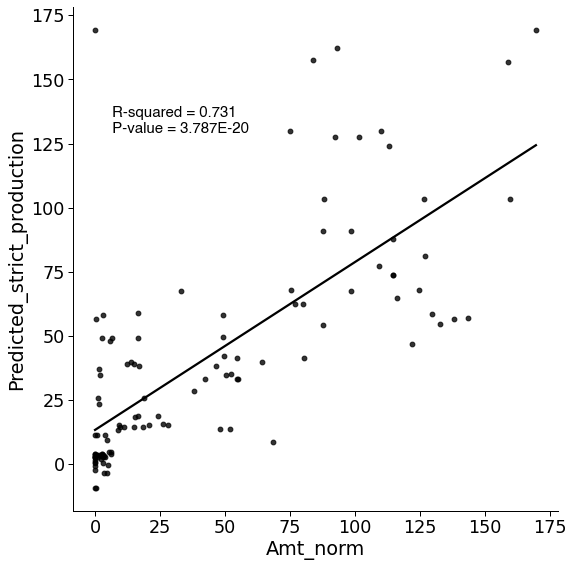

In [16]:
correlation_plot(predicted_vs_sampled,"Amt_norm","Predicted_strict_production")

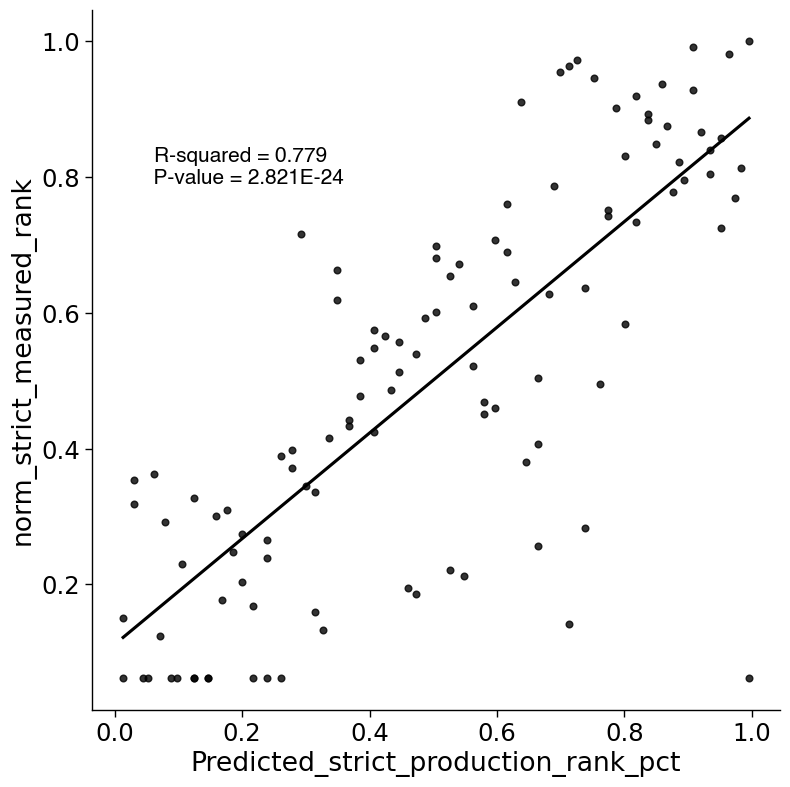

In [17]:
correlation_plot(predicted_vs_sampled,"Predicted_strict_production_rank_pct","norm_strict_measured_rank")

### 1.3 Merging the dataframes for updating the model 

In [18]:
first_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_1st_iteration_all_analytics.csv')
second_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_2nd_iteration_all_analytics.csv')
second_input_for_ml.columns = ['Line_name', '0','1','2','3','Amt_norm']

In [19]:
new_input_for_ml = pd.concat([first_input_for_ml,second_input_for_ml ])
new_input_for_ml.columns = ['Line_name', '0','1','2','3','Amt_norm']

new_input_for_ml

,Line_name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_C01,1,2,5,9,0.536658
2,yp49_D01,2,4,7,3,0.175896
3,yp49_E01,2,1,5,7,0.345201
4,yp49_F01,3,3,6,1,26.416324
...,...,...,...,...,...,...
124,yp54_A04,4,1,6,1,15.322951
125,yp54_C04,5,2,6,3,94.318358
126,yp54_C09,3,1,6,3,46.469517
127,yp54_D12,5,1,6,6,3.718051


### 1.2 Update dataframe Change 

In [20]:
df_test = h2o.H2OFrame(pd.concat([new_input_for_ml], axis='columns'))
df_test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:296
Cols:6




,Line_name,0,1,2,3,Amt_norm
type,string,int,int,int,int,real
mins,NaN,1.0,1.0,5.0,1.0,0.0
mean,NaN,4.773648648648647,2.1452702702702697,6.135135135135138,4.750000000000003,29.09914171700607
maxs,NaN,8.0,4.0,8.0,10.0,277.3078163064027
sigma,NaN,1.946604570553522,1.115003045338059,1.0554051268004114,2.5930153901508803,46.17102137141943
zeros,0,0,0,0,0,72
missing,0,0,0,0,0,0
0,yp49_A01,1.0,2.0,5.0,1.0,0.972700677969159
1,yp49_C01,1.0,2.0,5.0,9.0,0.5366584806139938
2,yp49_D01,2.0,4.0,7.0,3.0,0.1758959746019849


In [21]:
# Since the data is categorical we need to make it from numerical to categorical 
df_test['0']= df_test['0'].asfactor()
df_test['1']= df_test['1'].asfactor()
df_test['2'] = df_test['2'].asfactor()
df_test['3'] = df_test['3'].asfactor()

In [22]:
df_test.describe()

Rows:296
Cols:6




,Line_name,0,1,2,3,Amt_norm
type,string,enum,enum,enum,enum,real
mins,NaN,,,,,0.0
mean,NaN,,,,,29.09914171700607
maxs,NaN,,,,,277.3078163064027
sigma,NaN,,,,,46.17102137141943
zeros,0,,,,,72
missing,0,0,0,0,0,0
0,yp49_A01,1,2,5,1,0.972700677969159
1,yp49_C01,1,2,5,9,0.5366584806139938
2,yp49_D01,2,4,7,3,0.1758959746019849


Set some arguments for the autoML. 


Important here is that we dont split the dataset but rather keep the cross-validation validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split. See: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html


## 2 RUN automl

Here we are defining the autoML object and after we can train it

In [34]:
# Select the columns we want to train on
feature_cols = ['0', '1', '2', '3']

# Initialize H2O autoML class
AutoML = H2OAutoML(
    max_runtime_secs=0,  # 1 hour =int(3600 * 1) , if unlimited time is wanted then set this to zero = 0
    max_models=None,  # None =  no limit
    nfolds=10,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
    seed=1,            # Reproducibility
    #exclude_algos = ["StackedEnsemble"],
    sort_metric = "MAE",
    keep_cross_validation_predictions=True 
)

Train a model based on the target and the df. 


It has been Commented out and saved as showed below

In [35]:
%%time

AutoML.train(
     x=feature_cols,
     y='Amt_norm',
     training_frame=df_test,
 )


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 33.3 s, sys: 2.78 s, total: 36 s
Wall time: 58min 52s
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_lr_search_selection_AutoML_1_20221213_155405_select_grid_model_3


Model Summary: 


,,number_of_trees
0,,156.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 421.29486557698954
RMSE: 20.525468705415463
MAE: 9.148834070707577
RMSLE: NaN
Mean Residual Deviance: 421.29486557698954

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 619.2601551707306
RMSE: 24.88493831960872
MAE: 12.522050341403244
RMSLE: NaN
Mean Residual Deviance: 619.2601551707306

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,12.509687,2.744713,14.918649,12.083114,12.719765,16.045069,7.423237,15.527604,14.125184,9.589990,11.771118,10.893149
1,mean_residual_deviance,619.130000,331.369900,637.066100,431.422670,479.545800,1421.226300,165.851230,618.189450,826.546260,520.081850,647.600040,443.770450
2,mse,619.130000,331.369900,637.066100,431.422670,479.545800,1421.226300,165.851230,618.189450,826.546260,520.081850,647.600040,443.770450
3,r2,0.673519,0.179883,0.568123,0.825567,0.735960,0.611876,0.910472,0.735709,0.709419,0.576398,0.268307,0.793362
4,residual_deviance,619.130000,331.369900,637.066100,431.422670,479.545800,1421.226300,165.851230,618.189450,826.546260,520.081850,647.600040,443.770450
5,rmse,24.141918,6.350661,25.240170,20.770716,21.898535,37.699154,12.878324,24.863415,28.749718,22.805304,25.447987,21.065860
6,rmsle,0.861245,0.246143,1.285108,0.771690,0.647718,0.771036,NaN,NaN,NaN,NaN,NaN,0.830671



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-12-13 16:49:47,2.140 sec,0.0,54.244559,28.879174,2942.472227
1,,2022-12-13 16:49:47,2.148 sec,15.0,38.779313,19.568256,1503.835114
2,,2022-12-13 16:49:47,2.157 sec,30.0,31.253069,15.748491,976.754308
3,,2022-12-13 16:49:47,2.167 sec,45.0,27.412432,13.570354,751.441424
4,,2022-12-13 16:49:47,2.182 sec,60.0,25.077883,12.122273,628.900197
5,,2022-12-13 16:49:47,2.198 sec,75.0,23.538747,11.137741,554.072613
6,,2022-12-13 16:49:47,2.210 sec,90.0,22.567410,10.493061,509.287974
7,,2022-12-13 16:49:47,2.222 sec,105.0,21.849792,10.001497,477.413419
8,,2022-12-13 16:49:47,2.235 sec,120.0,21.345264,9.690114,455.620301
9,,2022-12-13 16:49:47,2.250 sec,135.0,20.964273,9.441597,439.500730



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,1.2,209357.968750,1.000000,0.171633
1,3.7,143852.390625,0.687112,0.117931
2,3.6,137481.437500,0.656681,0.112708
3,2.7,96753.203125,0.462142,0.079319
4,0.5,87002.945312,0.415570,0.071326
5,1.4,82930.289062,0.396117,0.067987
6,0.1,82312.304688,0.393165,0.067480
7,1.3,78622.312500,0.375540,0.064455
8,2.8,62086.320312,0.296556,0.050899
9,0.4,33448.929688,0.159769,0.027422



See the whole table with table.as_data_frame()


In [36]:
print('DOOOOOOONE')

DOOOOOOONE


## 3. Processing model


In [37]:
# saving the models
leaderboard = AutoML.leaderboard
model_ids = list(leaderboard['model_id'].as_data_frame().iloc[:,0])


# get rid of models with stacked ensemble - they; the tree-based models, the tree ensemble (GBM or Random Forest) ends up memorizing the training data.
#The model has a poor time generalizing on validation data
for model in model_ids:
    if 'StackedEnsemble' in model:
        model_ids.remove(model)

out_path = 'ConStrain_on_google_colab/Data/processed/ML_second_lib_leaderbords'

for m_id in model_ids:
     mdl = h2o.get_model(m_id)
     h2o.save_model(model=mdl, path=out_path, force=True)


In [38]:
len(model_ids)

931

Now we want to extract the best models that are not StackedEnsemble

In [39]:
df_from_h2o_object = leaderboard.as_data_frame(use_pandas=True, header=True)
df_from_h2o_object

,model_id,mae,rmse,mse,rmsle,mean_residual_deviance
0,XGBoost_lr_search_selection_AutoML_1_20221213_155405_select_grid_m...,12.522050,24.884938,619.260155,NaN,619.260155
1,StackedEnsemble_AllModels_5_AutoML_1_20221213_155405,12.624179,24.084135,580.045573,0.888022,580.045573
2,StackedEnsemble_BestOfFamily_6_AutoML_1_20221213_155405,12.697097,24.648146,607.531097,NaN,607.531097
3,XGBoost_grid_1_AutoML_1_20221213_155405_model_165,12.727607,25.350302,642.637824,NaN,642.637824
4,StackedEnsemble_BestOfFamily_4_AutoML_1_20221213_155405,12.928616,24.997404,624.870197,NaN,624.870197
...,...,...,...,...,...,...
936,GBM_grid_1_AutoML_1_20221213_155405_model_48,29.081092,40.334852,1626.900306,NaN,1626.900306
937,GBM_grid_1_AutoML_1_20221213_155405_model_6,29.143423,40.184123,1614.763734,NaN,1614.763734
938,GBM_grid_1_AutoML_1_20221213_155405_model_14,29.301669,40.992241,1680.363816,NaN,1680.363816
939,GBM_grid_1_AutoML_1_20221213_155405_model_27,29.516332,40.678130,1654.710260,NaN,1654.710260


In [40]:
index_to_delete = []
for index, row in df_from_h2o_object.iterrows():
    if 'StackedEnsemble' in row['model_id']:
        index_to_delete.append(index)

data_wo_ensemble = df_from_h2o_object.drop(labels=index_to_delete, axis=0)
final_df = h2o.H2OFrame(data_wo_ensemble)
final_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,mae,rmse,mse,rmsle,mean_residual_deviance
XGBoost_lr_search_selection_AutoML_1_20221213_155405_select_grid_model_3,12.5221,24.8849,619.26,nan,619.26
XGBoost_grid_1_AutoML_1_20221213_155405_model_165,12.7276,25.3503,642.638,nan,642.638
XGBoost_grid_1_AutoML_1_20221213_155405_model_131,13.0556,25.1855,634.31,nan,634.31
DeepLearning_grid_1_AutoML_1_20221213_155405_model_58,13.7458,25.1236,631.193,nan,631.193
XGBoost_grid_1_AutoML_1_20221213_155405_model_178,13.817,25.3518,642.713,nan,642.713
XGBoost_grid_1_AutoML_1_20221213_155405_model_776,13.8715,25.3275,641.484,nan,641.484
XGBoost_grid_1_AutoML_1_20221213_155405_model_77,13.8751,25.6605,658.461,nan,658.461
DeepLearning_grid_1_AutoML_1_20221213_155405_model_37,13.9093,24.4246,596.559,nan,596.559
DeepLearning_grid_1_AutoML_1_20221213_155405_model_54,13.983,24.8657,618.303,nan,618.303
DeepLearning_grid_1_AutoML_1_20221213_155405_model_38,14.0587,24.9537,622.688,nan,622.688


### 3.1 Saving the best model

In [41]:
best_model = AutoML.get_best_model()
best_model

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_lr_search_selection_AutoML_1_20221213_155405_select_grid_model_3


Model Summary: 


,,number_of_trees
0,,156.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 421.29486557698954
RMSE: 20.525468705415463
MAE: 9.148834070707577
RMSLE: NaN
Mean Residual Deviance: 421.29486557698954

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 619.2601551707306
RMSE: 24.88493831960872
MAE: 12.522050341403244
RMSLE: NaN
Mean Residual Deviance: 619.2601551707306

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,12.509687,2.744713,14.918649,12.083114,12.719765,16.045069,7.423237,15.527604,14.125184,9.589990,11.771118,10.893149
1,mean_residual_deviance,619.130000,331.369900,637.066100,431.422670,479.545800,1421.226300,165.851230,618.189450,826.546260,520.081850,647.600040,443.770450
2,mse,619.130000,331.369900,637.066100,431.422670,479.545800,1421.226300,165.851230,618.189450,826.546260,520.081850,647.600040,443.770450
3,r2,0.673519,0.179883,0.568123,0.825567,0.735960,0.611876,0.910472,0.735709,0.709419,0.576398,0.268307,0.793362
4,residual_deviance,619.130000,331.369900,637.066100,431.422670,479.545800,1421.226300,165.851230,618.189450,826.546260,520.081850,647.600040,443.770450
5,rmse,24.141918,6.350661,25.240170,20.770716,21.898535,37.699154,12.878324,24.863415,28.749718,22.805304,25.447987,21.065860
6,rmsle,0.861245,0.246143,1.285108,0.771690,0.647718,0.771036,NaN,NaN,NaN,NaN,NaN,0.830671



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-12-13 16:49:47,2.140 sec,0.0,54.244559,28.879174,2942.472227
1,,2022-12-13 16:49:47,2.148 sec,15.0,38.779313,19.568256,1503.835114
2,,2022-12-13 16:49:47,2.157 sec,30.0,31.253069,15.748491,976.754308
3,,2022-12-13 16:49:47,2.167 sec,45.0,27.412432,13.570354,751.441424
4,,2022-12-13 16:49:47,2.182 sec,60.0,25.077883,12.122273,628.900197
5,,2022-12-13 16:49:47,2.198 sec,75.0,23.538747,11.137741,554.072613
6,,2022-12-13 16:49:47,2.210 sec,90.0,22.567410,10.493061,509.287974
7,,2022-12-13 16:49:47,2.222 sec,105.0,21.849792,10.001497,477.413419
8,,2022-12-13 16:49:47,2.235 sec,120.0,21.345264,9.690114,455.620301
9,,2022-12-13 16:49:47,2.250 sec,135.0,20.964273,9.441597,439.500730



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,1.2,209357.968750,1.000000,0.171633
1,3.7,143852.390625,0.687112,0.117931
2,3.6,137481.437500,0.656681,0.112708
3,2.7,96753.203125,0.462142,0.079319
4,0.5,87002.945312,0.415570,0.071326
5,1.4,82930.289062,0.396117,0.067987
6,0.1,82312.304688,0.393165,0.067480
7,1.3,78622.312500,0.375540,0.064455
8,2.8,62086.320312,0.296556,0.050899
9,0.4,33448.929688,0.159769,0.027422



See the whole table with table.as_data_frame()


In [42]:
model_path = h2o.save_model(model=best_model, path="ConStrain_on_google_colab/Data/processed/ML_models_second_lib", force=True)

### 3.2 Exporting the leaderboard

In [43]:
# saving the leaderboard
import os
h2o.export_file(leaderboard, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


### 3.3 Importing the leaderboard

In [44]:
models_path = 'ConStrain_on_google_colab/Data/processed/ML_second_lib_leaderbords'

lb = h2o.import_file(path=os.path.join(models_path, "aml_leaderboard.h2o"))
lb

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,mae,rmse,mse,rmsle,mean_residual_deviance
XGBoost_lr_search_selection_AutoML_1_20221213_155405_select_grid_model_3,12.5221,24.8849,619.26,nan,619.26
StackedEnsemble_AllModels_5_AutoML_1_20221213_155405,12.6242,24.0841,580.046,0.888022,580.046
StackedEnsemble_BestOfFamily_6_AutoML_1_20221213_155405,12.6971,24.6481,607.531,nan,607.531
XGBoost_grid_1_AutoML_1_20221213_155405_model_165,12.7276,25.3503,642.638,nan,642.638
StackedEnsemble_BestOfFamily_4_AutoML_1_20221213_155405,12.9286,24.9974,624.87,nan,624.87
XGBoost_grid_1_AutoML_1_20221213_155405_model_131,13.0556,25.1855,634.31,nan,634.31
StackedEnsemble_AllModels_6_AutoML_1_20221213_155405,13.2658,24.2898,589.995,nan,589.995
DeepLearning_grid_1_AutoML_1_20221213_155405_model_58,13.7458,25.1236,631.193,nan,631.193
XGBoost_grid_1_AutoML_1_20221213_155405_model_178,13.817,25.3518,642.713,nan,642.713
XGBoost_grid_1_AutoML_1_20221213_155405_model_776,13.8715,25.3275,641.484,nan,641.484


## 4. Importing the best model

In [45]:
best_model = h2o.load_model("ConStrain_on_google_colab/Data/processed/ML_models_second_lib/"+lb[0,0])
my_local_model = h2o.download_model(best_model, path="ConStrain_on_google_colab/Data/processed/ML_models")
uploaded_model = h2o.upload_model(my_local_model)


### 4.1 Investigate model

In [46]:
best_model.cross_validation_holdout_predictions()

predict
2.62505
1.36812
0.25857
0.243338
-3.43682
26.4084
0.889619
0.221797
0.981092
0.470854


Get the cross validation predictions

In [47]:
# This is where list of cv preds are stored (one element per fold):
cross_validation_holdout_predictions = best_model.cross_validation_holdout_predictions()
print(cross_validation_holdout_predictions)
print(len(cross_validation_holdout_predictions))

predict
2.62505
1.36812
0.25857
0.243338
-3.43682
26.4084
0.889619
0.221797
0.981092
0.470854



296


In [48]:
cross_validation_holdout_predictions.frame_id

'cv_holdout_prediction_XGBoost_lr_search_selection_AutoML_1_20221213_155405_select_grid_model_3'

In [49]:
cv_fram = cross_validation_holdout_predictions.as_data_frame()
cv_fram

,predict
246,74.119797
247,106.938560
248,35.592903
249,79.326881
250,93.360176
251,93.704605
252,89.360992
253,18.423040
254,86.083565
255,17.984858


In [50]:
# However you most likely want a single-column frame including all cv preds
cross_validation_predictions = best_model.cross_validation_predictions()
print(len(cross_validation_predictions))

10


In [51]:
as_data_frame_df_test = df_test.as_data_frame()
as_data_frame_CV_predictions = cross_validation_holdout_predictions.as_data_frame()

In [52]:
df3 = pd.merge(as_data_frame_df_test, as_data_frame_CV_predictions, left_index=True, right_index=True)
df3 = df3.sort_values(by= 'Amt_norm', ascending= False)
df3 = df3.reset_index()
df3['ranked_pct'] = df3['Amt_norm'].rank(pct= True)
df3['ranked_pct_predicted'] = df3['predict'].rank(pct= True)
df3

,index,Line_name,0,1,2,3,Amt_norm,predict,ranked_pct,ranked_pct_predicted
0,73,yp50_D03,5,2,6,3,277.307816,96.999344,1.000000,0.918919
1,75,yp50_G03,6,2,6,5,176.917201,111.369507,0.996622,0.969595
2,205,yp53_D09,5,2,6,5,169.631396,100.853073,0.993243,0.939189
3,86,yp50_E05,5,1,6,8,163.352037,75.240669,0.989865,0.814189
4,193,yp53_C06,6,2,6,4,159.517718,114.271469,0.986486,0.976351
...,...,...,...,...,...,...,...,...,...,...
291,92,yp50_G06,6,4,6,6,0.000000,0.126829,0.123311,0.131757
292,95,yp50_B07,4,3,8,7,0.000000,0.541050,0.123311,0.263514
293,99,yp50_G07,6,1,5,7,0.000000,1.518117,0.123311,0.381757
294,101,yp50_B08,4,4,5,7,0.000000,0.131664,0.123311,0.138514


In [53]:
len(df3)

296

In [54]:
df3['color'] = "black" 

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_5141/4051055021.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2['category'] = 'Predicted'
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_5141/4051055021.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['category'] = 'Strictosidine'


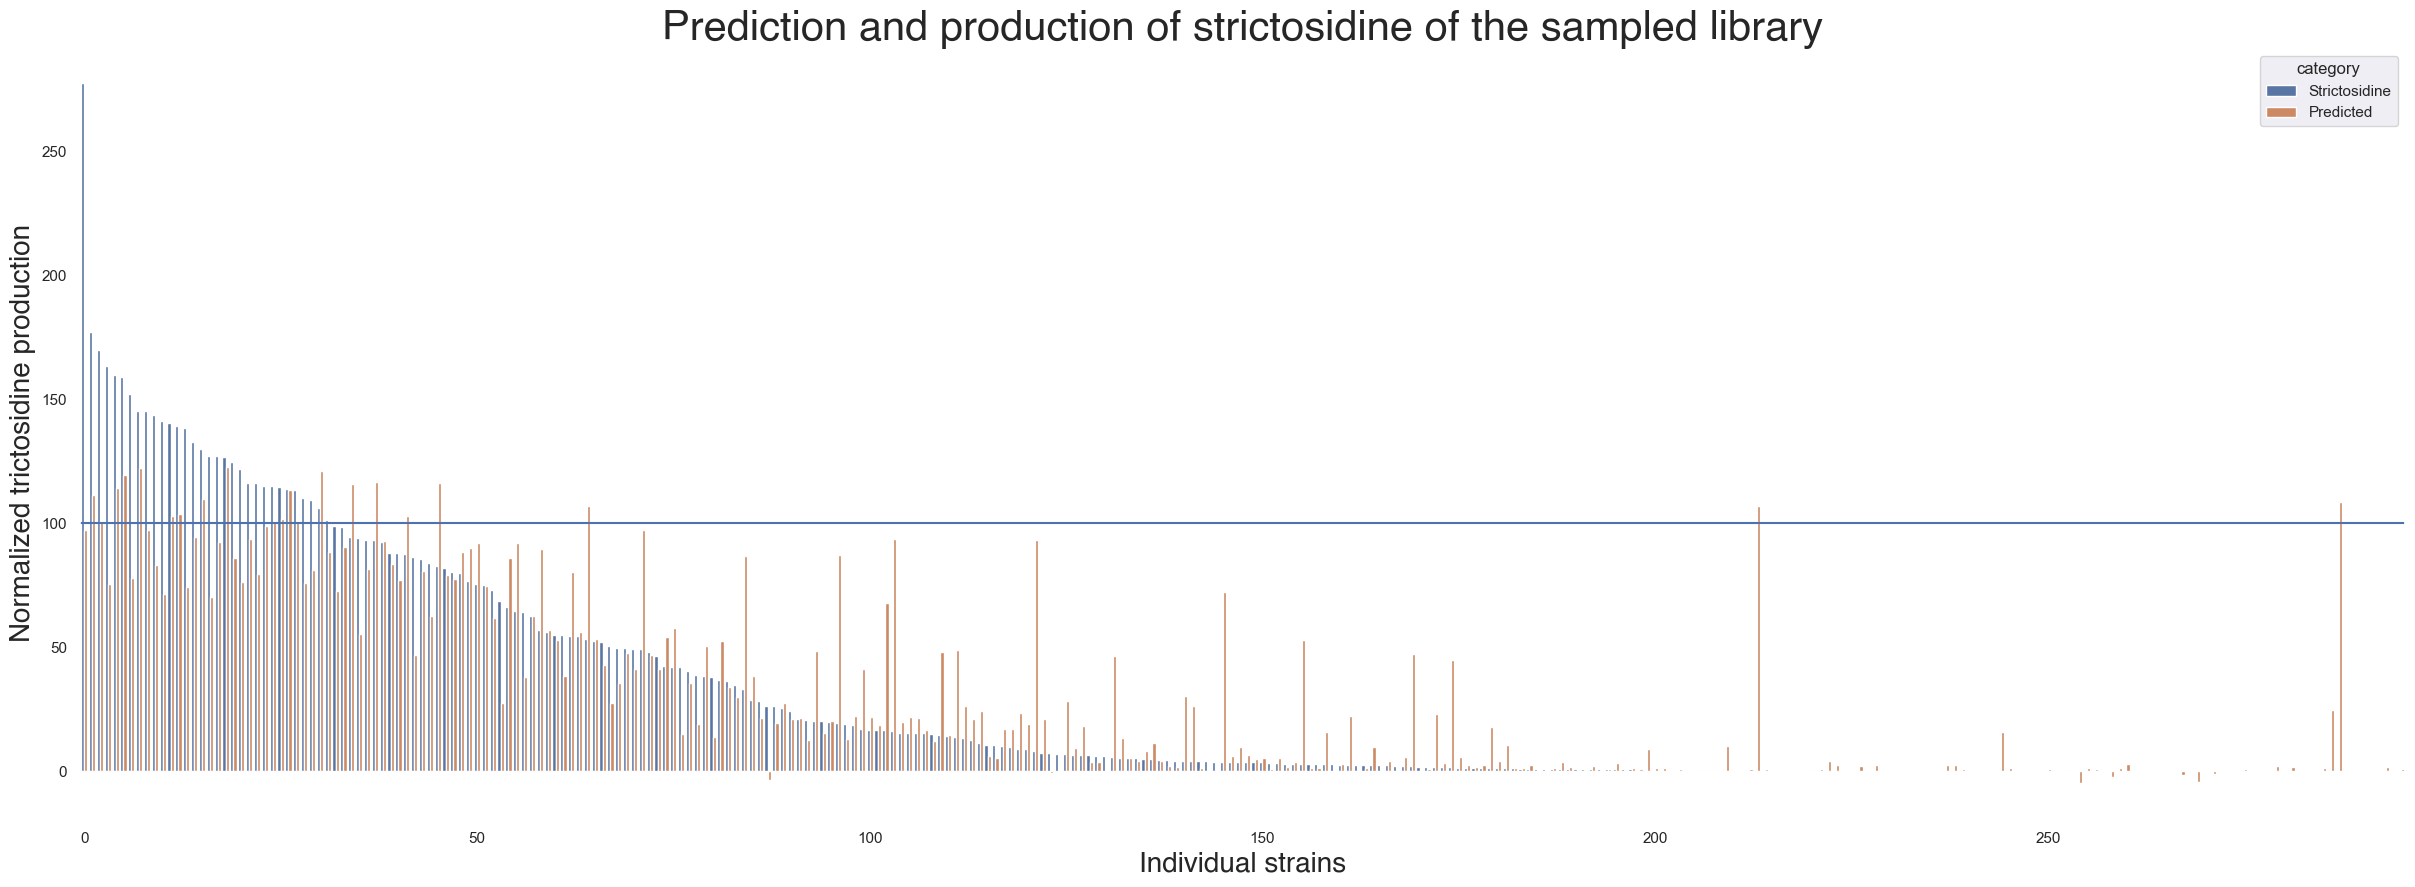

In [55]:
sns.set(rc = {'figure.figsize':(30,10) })

# initialize
ds1 = df3[['Line_name', 'Amt_norm']]
ds1.columns = ['Line_name', 'strict']

ds2 = df3[['Line_name', 'predict']]
ds2.columns = ['Line_name', 'strict']


ds2['category'] = 'Predicted'
ds1['category'] = 'Strictosidine'
dss = pd.concat([ds1, ds2])

ax = sns.barplot(x='Line_name', y='strict', hue='category', data=dss)

ax = plt.gca()
ax.set_xlabel('Individual strains', size = 20, fontname='Helvetica')
ax.set_ylabel('Normalized trictosidine production', size = 20, fontname='Helvetica')
ax.set_title('Prediction and production of strictosidine of the sampled library', size = 30, fontname='Helvetica')

# white background
ax.set_facecolor("white")

plt.xscale('linear') 

# normalized line
ax.axhline(100)


#ax.add_line
name = 'Strictosidine and predicted values for all genotypes samples (dbtl1+2)'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL2/'+name+'.svg',format = 'SVG',  dpi = 120)


None

### CV-Holdout predictions vs measured

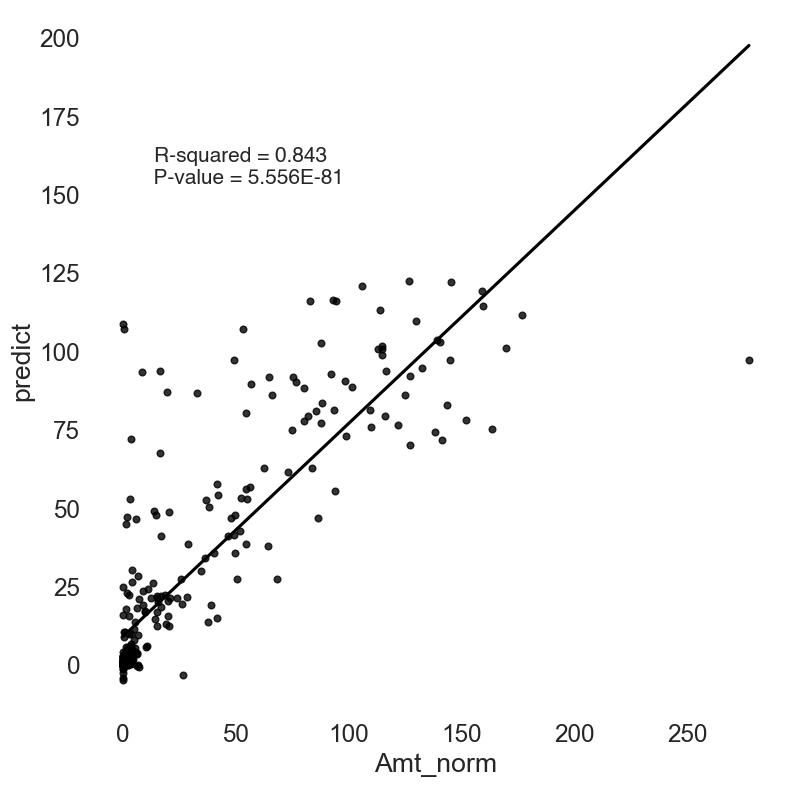

In [74]:
correlation_plot(df3,"Amt_norm","predict")

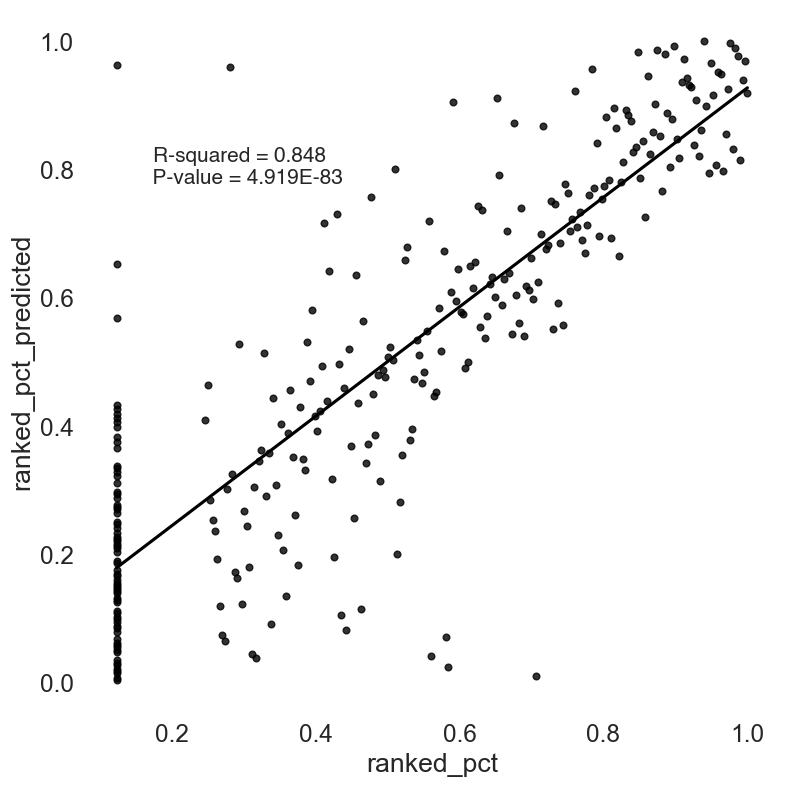

In [75]:
correlation_plot(df3,"ranked_pct","ranked_pct_predicted")

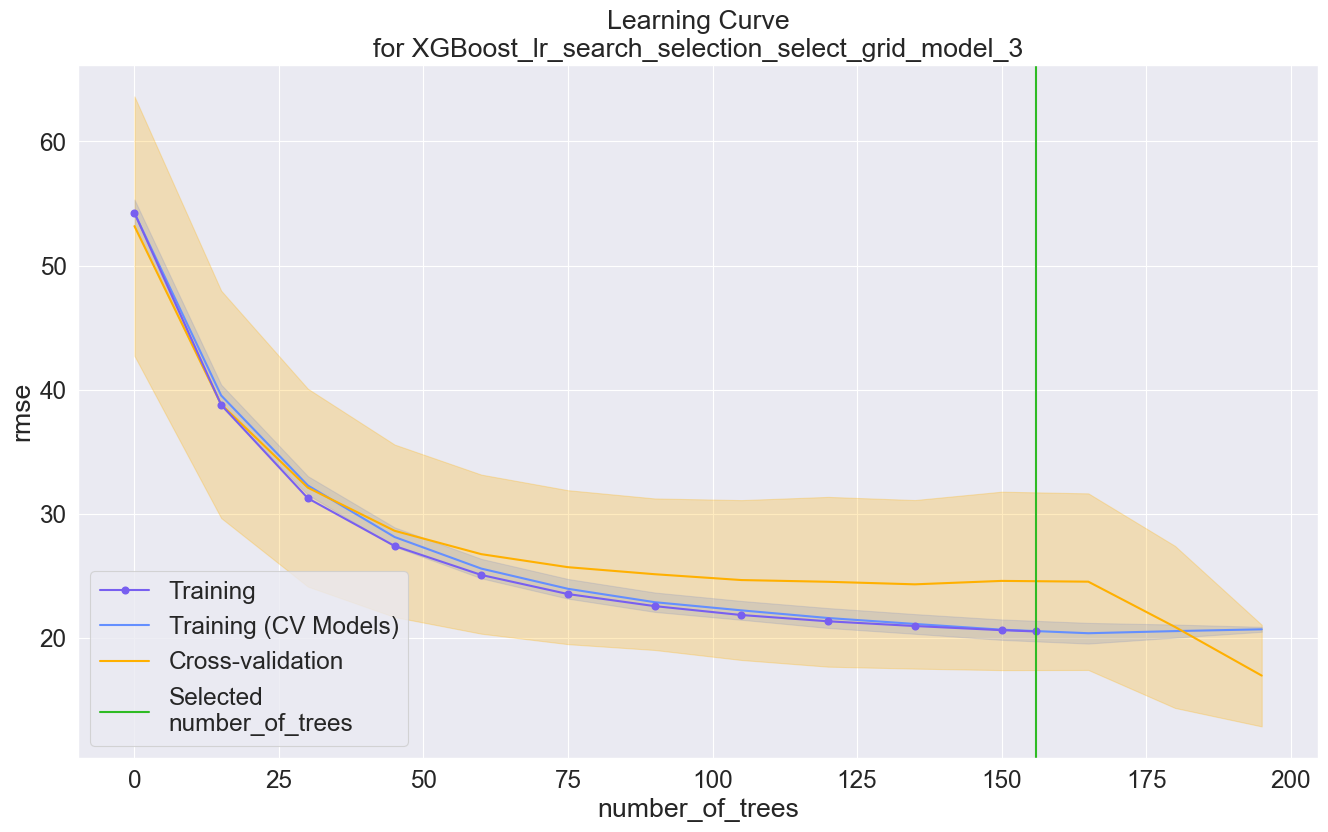

In [58]:

learning_curve = uploaded_model.learning_curve_plot()

name = '1st_analytics_learning_curve'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL2/'+name+'.pdf',format = 'PDF',  dpi = 120)


#plt.title('Number of records by State')
None

In [59]:
as_data_frame_df_test

,Line_name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_C01,1,2,5,9,0.536658
2,yp49_D01,2,4,7,3,0.175896
3,yp49_E01,2,1,5,7,0.345201
4,yp49_F01,3,3,6,1,26.416324
...,...,...,...,...,...,...
291,yp54_A04,4,1,6,1,15.322951
292,yp54_C04,5,2,6,3,94.318358
293,yp54_C09,3,1,6,3,46.469517
294,yp54_D12,5,1,6,6,3.718051


### 4.3 Find predicted genotypes

In [60]:
import numpy as np

In [61]:
all_genotypes = pd.read_csv('ConStrain_on_google_colab/Data/processed/remaining_genotypes_after_first_iteration.csv',)
all_genotypes =all_genotypes[['0','1','2','3']]
all_genotypes

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
2,1,1,5,4
3,1,1,5,5
4,1,1,5,7
...,...,...,...,...
1117,8,4,8,6
1118,8,4,8,7
1119,8,4,8,8
1120,8,4,8,9


In [62]:
all_genotypes_df = h2o.H2OFrame(pd.concat([all_genotypes], axis='columns'))
all_genotypes_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0,1,2,3
1,1,5,1
1,1,5,2
1,1,5,4
1,1,5,5
1,1,5,7
1,1,5,8
1,1,5,9
1,1,6,1
1,1,6,2
1,1,6,3


In [63]:
#merge_ = pd.merge(new_input_for_ml,all_genotypes, on= ['0','1','2','3'])
#merge_
new_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/processed/input_for_ml_2nd_iteration.csv',  index_col=False)

input_fixed = new_input_for_ml[['0','1','2','3']]
input_fixed

,0,1,2,3
0,4,1,5,2
1,4,1,5,2
2,4,2,5,2
3,5,1,5,2
4,5,1,5,2
...,...,...,...,...
122,7,2,5,7
123,7,2,5,7
124,7,2,6,7
125,4,2,5,2


### 4.4 Getting rid of the genotypes we have already tested:

In [64]:
df_diff = all_genotypes[~all_genotypes.apply(tuple,1).isin(input_fixed.apply(tuple,1))]
#df_diff.to_csv('../data/processed/remaining_genotypes_after_first_iteration.csv')
df_diff

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
2,1,1,5,4
3,1,1,5,5
4,1,1,5,7
...,...,...,...,...
1117,8,4,8,6
1118,8,4,8,7
1119,8,4,8,8
1120,8,4,8,9


In [65]:
# make the diff into a df 
all_genotypes_df = h2o.H2OFrame(pd.concat([df_diff], axis='columns'))
all_genotypes_df['0']= all_genotypes_df['0'].asfactor()
all_genotypes_df['1']= all_genotypes_df['1'].asfactor()
all_genotypes_df['2'] = all_genotypes_df['2'].asfactor()
all_genotypes_df['3'] = all_genotypes_df['3'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [66]:
predicted = best_model.predict(all_genotypes_df)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [67]:
len(predicted)

1049

In [68]:
predicted_norm = predicted.as_data_frame()
predicted_norm.head()

,predict
0,1.381696
1,0.937428
2,1.708319
3,1.602157
4,0.384537


In [69]:
# making predictions into a list
predicted_list = predicted_norm['predict'].values.tolist()

# Adding predictions to our dataframe
df_diff['predicted_norm_strict'] = predicted_list

# Sorting the dataframe
predicted_merged_sorted = df_diff.sort_values('predicted_norm_strict', ascending=False)
predicted_merged_sorted

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_5141/105107836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['predicted_norm_strict'] = predicted_list


,0,1,2,3,predicted_norm_strict
614,5,2,6,8,125.507683
610,5,2,6,4,123.953873
748,6,2,6,2,121.058182
605,5,2,5,8,119.939774
602,5,2,5,4,119.415718
...,...,...,...,...,...
862,7,1,7,1,-5.890666
869,7,1,7,9,-6.474187
865,7,1,7,4,-6.538404
864,7,1,7,3,-6.681534


If we want the names on the genotypes we can do the following: 

In [76]:
g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]
promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

g8h_genotype = []
cpr_genotype = []

pg8h_genotype = []
pcpr_genotype = []

predicted_list = []
# adding index of genotypes to individual rows 
for index, row in predicted_merged_sorted.iterrows():
    g8h_genotype.append(g8h_list_of_index[int(row['0'])-1])
    cpr_genotype.append(cpr_list_of_index[int(row['3'])-1])
    pg8h_genotype.append(promoters[int(row['1'])-1])
    pcpr_genotype.append(promoters[int(row['2'])-1])
    predicted_list.append(row['predicted_norm_strict'])
    
    
list_of_lists = [g8h_genotype,pg8h_genotype,pcpr_genotype, cpr_genotype, predicted_list  ]

Save the data to a csv 

## 5. Top 20 predicted producers

In [77]:
df_with_genotypes = pd.DataFrame(list_of_lists )
df_with_genotypes = df_with_genotypes.T
df_with_genotypes.columns = ['G8H', 'pG8H', 'pCPR', 'CPR', 'Predicted_strict_production']
df_with_genotypes.head(20)

,G8H,pG8H,pCPR,CPR,Predicted_strict_production
0,Smus,ENO2,TPI1,Cac,125.507683
1,Smus,ENO2,TPI1,Clo,123.953873
2,Rsep,ENO2,TPI1,Aan,121.058182
3,Smus,ENO2,CCW12,Cac,119.939774
4,Smus,ENO2,CCW12,Clo,119.415718
5,Smus,ENO2,CCW12,Aan,119.15493
6,Rsep,ENO2,TPI1,Cac,118.785843
7,Smus,ENO2,CCW12,Ara,113.73101
8,Rsep,ENO2,CCW12,Rse,113.126915
9,Rsep,ENO2,CCW12,Cac,111.33947


In [78]:
df_with_genotypes.to_csv('ConStrain_on_google_colab/Data/AutoML/top20_ML_predicted_after_second_DBTL_2nd_analytics_1.csv')

In [80]:
df_with_genotypes = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/top20_ML_predicted_after_second_DBTL_2nd_analytics_1.csv', index_col=False)
df_with_genotypes

,Unnamed: 0,G8H,pG8H,pCPR,CPR,Predicted_strict_production
0,0,Smus,ENO2,TPI1,Cac,125.507683
1,1,Smus,ENO2,TPI1,Clo,123.953873
2,2,Rsep,ENO2,TPI1,Aan,121.058182
3,3,Smus,ENO2,CCW12,Cac,119.939774
4,4,Smus,ENO2,CCW12,Clo,119.415718
...,...,...,...,...,...,...
1044,1044,Oeu,CYC1,MLS1,Cro,-5.890666
1045,1045,Oeu,CYC1,MLS1,Oeu,-6.474187
1046,1046,Oeu,CYC1,MLS1,Clo,-6.538404
1047,1047,Oeu,CYC1,MLS1,Ara,-6.681534


In [81]:
from constrain.plotting.plotting import bar_plot
bar_plot

<function constrain.plotting.plotting.bar_plot(x: list, y: list, error_bar: list = None, horisontal_line=True, save_pdf=True, path='') -> None>

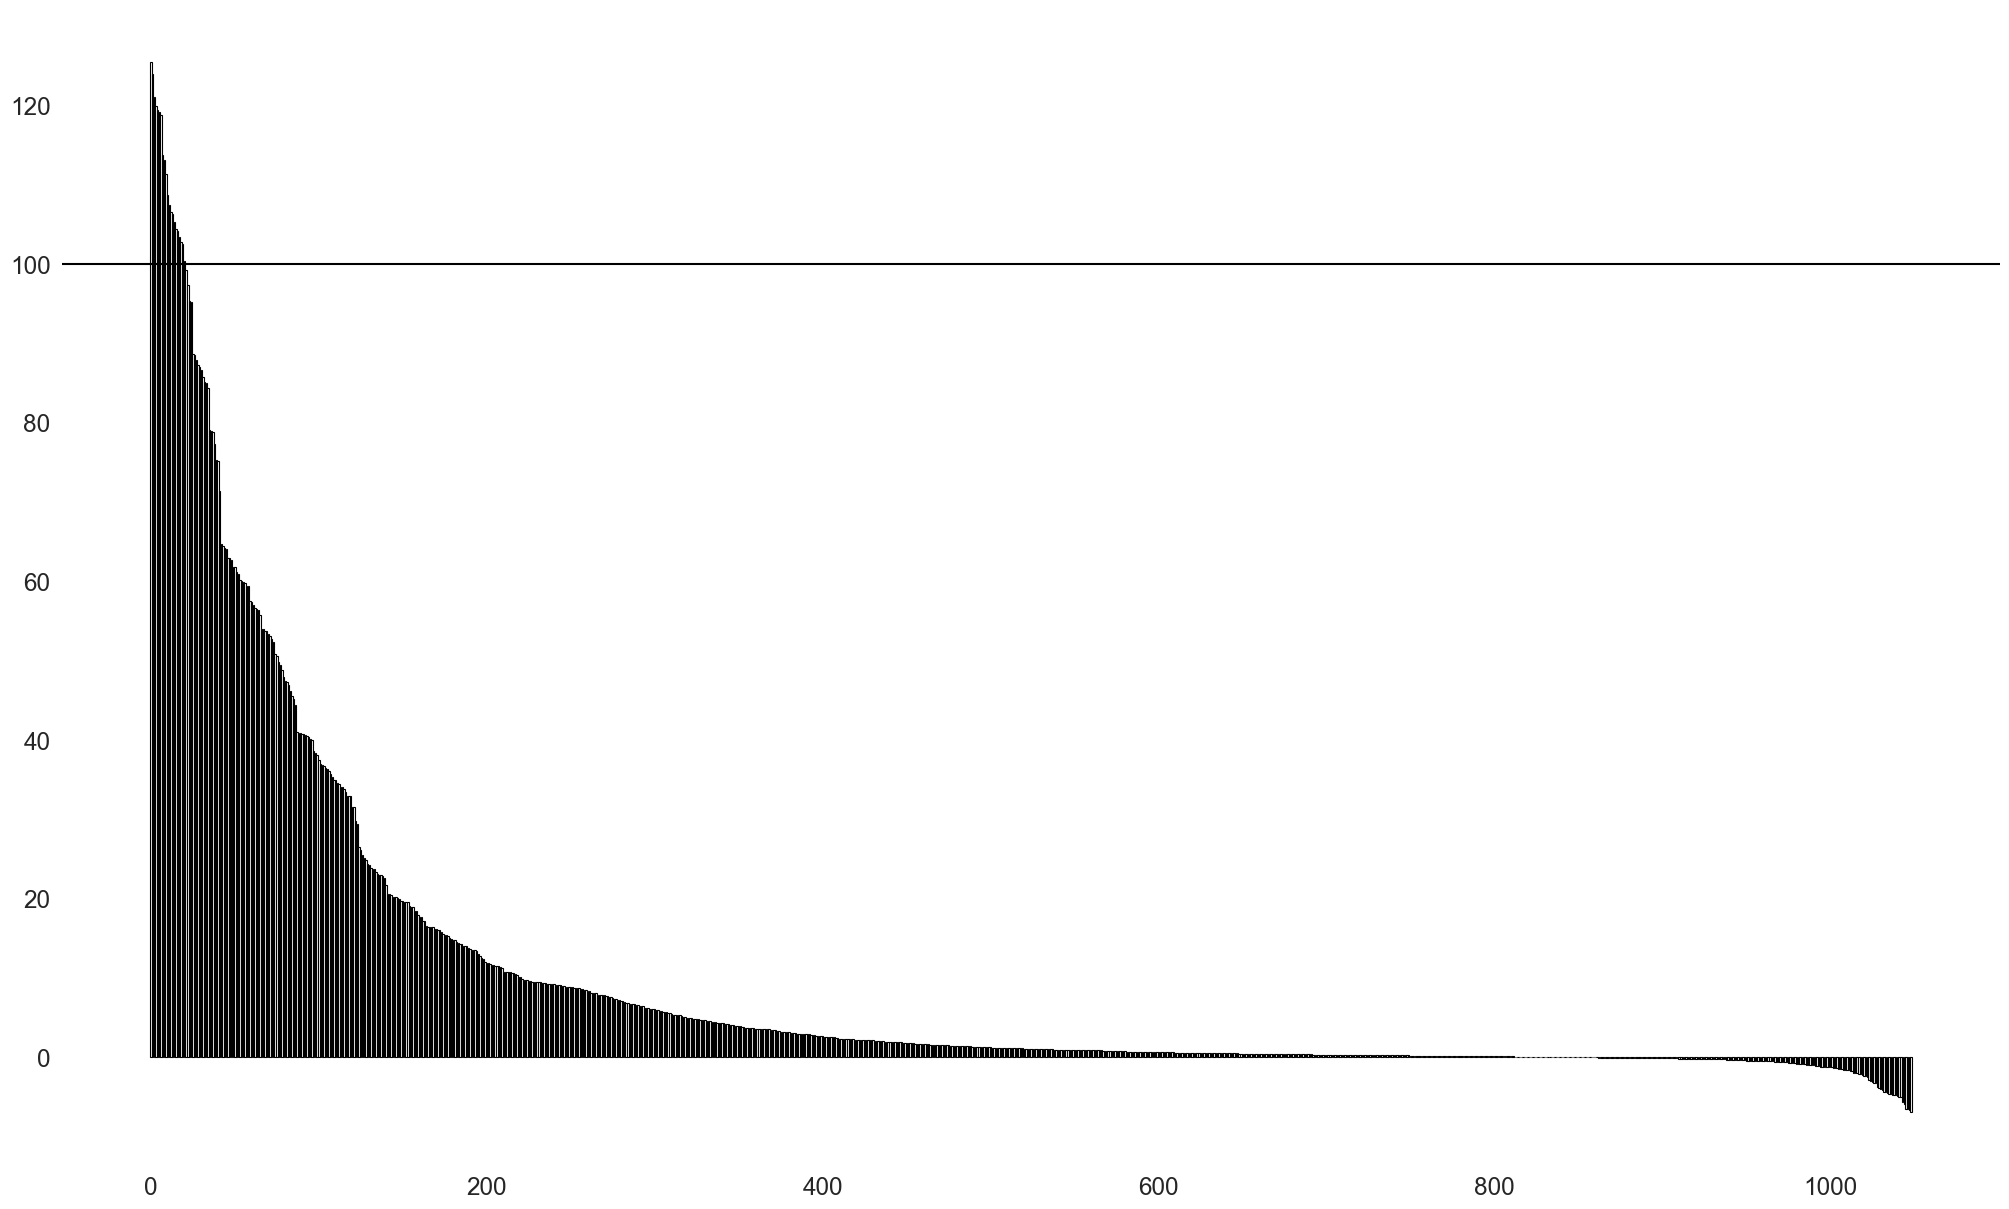

In [82]:
x = list(df_with_genotypes.index)
y = list(df_with_genotypes['Predicted_strict_production'])

bar_plot(x, y)

In [83]:
df_with_genotypes.to_csv('ConStrain_on_google_colab/Data/AutoML/top20_ML_predicted_after_second_DBTL_2nd_analytics.csv', index=False)

In [84]:
df_with_genotypes = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/top20_ML_predicted_after_second_DBTL_2nd_analytics.csv')

In [85]:
df_with_genotypes['names'] = df_with_genotypes['G8H']+'-' +df_with_genotypes['pG8H']+ '_'+ df_with_genotypes['pCPR']+'_'+df_with_genotypes['CPR']

In [86]:
df_with_genotypes

,Unnamed: 0,G8H,pG8H,pCPR,CPR,Predicted_strict_production,names
0,0,Smus,ENO2,TPI1,Cac,125.507683,Smus-ENO2_TPI1_Cac
1,1,Smus,ENO2,TPI1,Clo,123.953873,Smus-ENO2_TPI1_Clo
2,2,Rsep,ENO2,TPI1,Aan,121.058182,Rsep-ENO2_TPI1_Aan
3,3,Smus,ENO2,CCW12,Cac,119.939774,Smus-ENO2_CCW12_Cac
4,4,Smus,ENO2,CCW12,Clo,119.415718,Smus-ENO2_CCW12_Clo
...,...,...,...,...,...,...,...
1044,1044,Oeu,CYC1,MLS1,Cro,-5.890666,Oeu-CYC1_MLS1_Cro
1045,1045,Oeu,CYC1,MLS1,Oeu,-6.474187,Oeu-CYC1_MLS1_Oeu
1046,1046,Oeu,CYC1,MLS1,Clo,-6.538404,Oeu-CYC1_MLS1_Clo
1047,1047,Oeu,CYC1,MLS1,Ara,-6.681534,Oeu-CYC1_MLS1_Ara


In [87]:
x_axis = list(df_with_genotypes['names'])[:20][::-1]
y_axis = list(df_with_genotypes['Predicted_strict_production'])[:20][::-1]

In [88]:
from constrain.plotting.plotting import horisontal_bar_plot

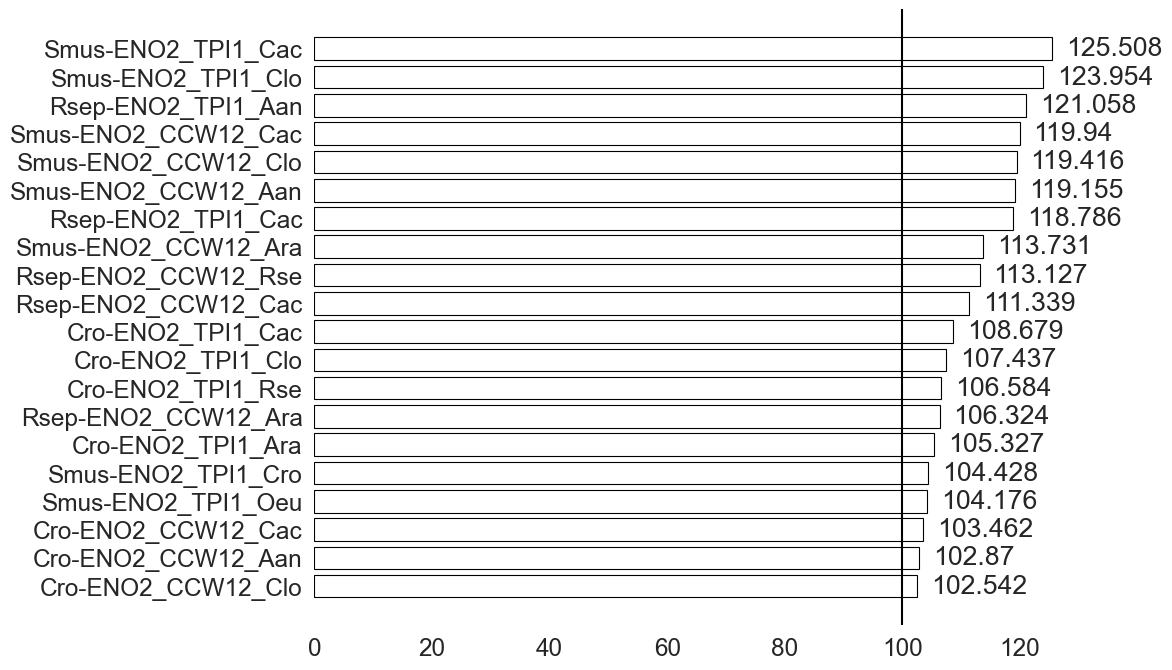

In [89]:
horisontal_bar_plot(x_axis,y_axis)

## 8. Learning curve on data

In [72]:
from constrain.machine_learning.auto_ml import autoML_on_partitioned_data

In [73]:
new_input_for_ml

,Line_name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_C01,1,2,5,9,0.536658
2,yp49_D01,2,4,7,3,0.175896
3,yp49_E01,2,1,5,7,0.345201
4,yp49_F01,3,3,6,1,26.416324
...,...,...,...,...,...,...
124,yp54_A04,4,1,6,1,15.322951
125,yp54_C04,5,2,6,3,94.318358
126,yp54_C09,3,1,6,3,46.469517
127,yp54_D12,5,1,6,6,3.718051


# SINGLE PARTITIONS 

In [85]:
##input
partitions = 5
feature_cols = ['0', '1', '2', '3']
training_column = 'Amt_norm'


all_mae = []

# partitioning
step = int(len(new_input_for_ml)/partitions)+1
partitions = [i for i in range(0, len(new_input_for_ml), step)]


# Partion columns  - used for getting the right output
partitions_col = partitions[1:]
partitions_col.append(len(new_input_for_ml))


# INCREASING THE SIZE OF THE DATASET
partitions_list = [new_input_for_ml[partitions[0]:partitions[i]] for i in range(1,len(partitions))]
# add the last_full partition 
partitions_list.append(new_input_for_ml[partitions[0]:])
partitions_list

### Making the dataframes into h2o dfs
list_of_df_test_frames = []

for df in partitions_list: 
    # initialize a h20 dataframe 
    df_test = h2o.H2OFrame(pd.concat([df], axis='columns'))

    # changing columns to strings
    for col in df.columns: 
        if col != training_column: 
            col = str(col)

    # making the dataframes categorical
    for column in df.columns:
        if col != training_column: 
            df_test[column] =  df_test[column].asfactor()    
    list_of_df_test_frames.append(df_test)
    
    
    

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [88]:
for i in list_of_df_test_frames:
    print(len(i))

60
120
180
240
296


In [96]:
autoML_dataclasses_list = []

# Initialize 5 - H2O autoML class
for i in range(len(list_of_df_test_frames)):
    AutoML = H2OAutoML(
        max_runtime_secs=0,  # 1 hour =int(3600 * 1) , if unlimited time is wanted then set this to zero = 0
        max_models=None,  # None =  no limit
        nfolds=10,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
        seed=1,            # Reproducibility
        sort_metric = "MAE",
        keep_cross_validation_predictions=True )
    
    autoML_dataclasses_list.append(AutoML)
autoML_dataclasses_list

In [97]:
#P60
autoML_dataclasses_list[0].train(
         x=feature_cols,
         y=training_column,
         training_frame=list_of_df_test_frames[0]) 


#P120
autoML_dataclasses_list[1].train(
         x=feature_cols,
         y=training_column,
         training_frame=list_of_df_test_frames[1]) 

#P180
autoML_dataclasses_list[2].train(
         x=feature_cols,
         y=training_column,
         training_frame=list_of_df_test_frames[2]) 

#P240
autoML_dataclasses_list[3].train(
         x=feature_cols,
         y=training_column,
         training_frame=list_of_df_test_frames[3]) 

#P296
autoML_dataclasses_list[4].train(
         x=feature_cols,
         y=training_column,
         training_frame=list_of_df_test_frames[4]) 

AutoML progress: |██
09:27:50.873: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 60.0.

███████████████████████████████████████████████████████████Job request failed Unexpected HTTP error: ('Connection aborted.', BadStatusLine('GET /3/Jobs/$03017f00000132d4ffffffff$_978f508bce2923c516eafaf4b66b41c3 HTTP/1.1\r\n')), will retry after 3s.
██| (done) 100%
AutoML progress: |
10:27:40.980: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 120.0.

███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
11:26:48.979: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 180.0.

███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██████████████████████████████████████████

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,13.850976,3.970502,13.863152,13.385116,13.303208,21.751776,15.043471,13.078551,9.594515,11.532929,18.633963,8.323079
1,mean_residual_deviance,690.591700,344.772160,806.509950,877.273100,563.040500,1365.160500,850.865660,625.317800,313.506300,420.166200,903.149800,180.926710
2,mse,690.591700,344.772160,806.509950,877.273100,563.040500,1365.160500,850.865660,625.317800,313.506300,420.166200,903.149800,180.926710
3,r2,0.626417,0.223073,0.685122,0.731006,0.739799,0.627022,0.051448,0.694638,0.816479,0.674481,0.468953,0.775219
4,residual_deviance,690.591700,344.772160,806.509950,877.273100,563.040500,1365.160500,850.865660,625.317800,313.506300,420.166200,903.149800,180.926710
5,rmse,25.457785,6.871267,28.399118,29.618795,23.728476,36.948080,29.169601,25.006355,17.706108,20.497955,30.052450,13.450900
6,rmsle,0.975379,0.127777,0.838891,1.120117,1.182110,0.995932,1.002404,0.748471,0.946499,0.934709,1.059125,0.925531


In [101]:
path = 'ConStrain_on_google_colab/Data/AutoML/testing_partitioning_second_round/'

In [115]:
first_best_model = autoML_dataclasses_list[4].get_best_model()

In [116]:
mae = first_best_model.mae()

In [117]:
mae

11.81768228871886

In [102]:
### getting the mae for each model
model_name = []
cv_sd_mae = []
cv_mean_mae = []
best_models_mae = []
for model in autoML_dataclasses_list: 
    # Mae for each model train
    best_model = model.get_best_model()
    best_models_mae.append(best_model.mae())

    # CV metrics 
    best_model_cv_summary = best_model.cross_validation_metrics_summary().as_data_frame()
    mean = float(best_model_cv_summary.iloc[0:1,0:3]['mean'])
    sd = float(best_model_cv_summary.iloc[0:1,0:3]['sd'])
    # save ot
    cv_mean_mae.append(mean)
    cv_sd_mae.append(sd)

    ## save names 
    model_name.append(best_model.model_id)


# saving ALL maes
all_mae.append(best_models_mae)
df = pd.DataFrame(all_mae, columns =partitions_col, dtype = float)
df = df.T

# add cv mean mae and sd
df['CV_mean_MAE'] = cv_mean_mae
df['CV_SD_MAE'] = cv_sd_mae
df['Model_name'] = model_name

# getting a unique name
from datetime import datetime
now = datetime.now() # current date and time
time = now.strftime("%Y_%m_%d_%H:%M")

df.to_csv(path + time+'_ml_models_running_over_partioned_data_fredag.csv')

In [28]:
%%capture
feature_cols = ['0', '1', '2', '3']
training_column = 'Amt_norm'
#autoML_on_partitioned_data(feature_cols, training_column,new_input_for_ml,training_time=0, partitions = 5,  path = 'ConStrain_on_google_colab/Data/AutoML/testing_partitioning_second_round/')

#for i in range(0,4): 
#    autoML_on_partitioned_data(feature_cols, training_column,new_input_for_ml,training_time=0, partitions = 5,  path = 'ConStrain_on_google_colab/Data/AutoML/testing_partitioning_second_round/')

In [25]:
from constrain.machine_learning.auto_ml import autoML_on_partitioned_data

In [26]:
shuffled_new_input_for_ml = new_input_for_ml.sample(frac=1, random_state= 1).reset_index(drop=True) # Random state sets a seed on the shuffeling
shuffled_new_input_for_ml

,Line_name,0,1,2,3,Amt_norm
0,yp54_A02,4,1,5,1,24.109070
1,yp53_E11,7,1,5,5,1.698060
2,yp54_F03,7,2,5,7,2.560352
3,yp53_F09,6,1,5,7,1.835963
4,yp54_A05,5,2,6,1,113.173462
...,...,...,...,...,...,...
291,yp53_D06,4,2,6,5,109.324769
292,yp54_B11,4,1,6,3,6.373347
293,yp50_C03,4,2,6,9,64.567815
294,yp53_E01,6,1,5,5,41.803421


In [ ]:
feature_cols = ['0', '1', '2', '3']
training_column = 'Amt_norm'
autoML_on_partitioned_data(feature_cols, training_column,
                           shuffled_new_input_for_ml,
                           training_time=0, 
                           partitions = 5, 
                           path = 'ConStrain_on_google_colab/Data/AutoML/testing_partitioning_second_round/')

In [27]:
feature_cols = ['0', '1', '2', '3']
training_column = 'Amt_norm'
autoML_on_partitioned_data(feature_cols, training_column,
                           shuffled_new_input_for_ml,
                           training_time=0, 
                           partitions = 5, 
                           path = 'ConStrain_on_google_colab/Data/AutoML/testing_partitioning_second_round/')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:48:52.241: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 60.0.

███████████████████████████████████████████████████████████████| (done) 100%
len of dataframes that are being trained on : 60
AutoML progress: |
14:48:42.834: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 120.0.

██████████████████████████████████████████████████████

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_a48a7e5af35596056ae1631caa964de2> was cancelled by the user.

In [118]:
import os

# folder path
dir_path = 'ConStrain_on_google_colab/Data/AutoML/testing_partitioning_second_round/'

# list file and directories
res = os.listdir(dir_path)
res

['2022_12_15_14:08_ml_models_running_over_partioned_data.csv',
 '2022_12_15_20:15_ml_models_running_over_partioned_data.csv',
 '2022_12_16_14:30_ml_models_running_over_partioned_data_fredag.csv',
 '.ipynb_checkpoints']

In [119]:
lst_of_pd_dataframes = []
for ml_partitioned in res:
    if ml_partitioned.endswith('.csv'):
        lst_of_pd_dataframes.append(pd.read_csv(dir_path+ml_partitioned))

Lets retrieve the data 

In [120]:
dfs = [df.set_index('Unnamed: 0') for df in lst_of_pd_dataframes]
concated = pd.concat(dfs, axis=1)
concated

,0,CV_mean_MAE,CV_SD_MAE,Model_name,0,CV_mean_MAE,CV_SD_MAE,Model_name,0,1,2,CV_mean_MAE,CV_SD_MAE,Model_name
Unnamed: 0,,,,,,,,,,,,,,
60,2.244198,4.716780,3.499275,DeepLearning_grid_3_AutoML_2_20221215_91100_model_1,2.514484,6.490958,4.559141,GBM_lr_annealing_selection_AutoML_9_20221215_151615_select_model,2.378864,2.378864,2.378864,6.759247,4.104145,GBM_lr_annealing_selection_AutoML_2_20221216_92743_select_model
120,5.179617,11.684734,7.085234,XGBoost_lr_search_selection_AutoML_4_20221215_101122_select_grid_m...,5.043144,11.679893,7.090293,XGBoost_lr_search_selection_AutoML_12_20221215_161617_select_grid_...,5.043144,5.043144,5.043144,11.679893,7.090293,XGBoost_lr_search_selection_AutoML_3_20221216_102740_select_grid_m...
180,4.993560,9.641539,4.611245,XGBoost_grid_1_AutoML_5_20221215_111040_model_1104,5.182674,9.802942,4.282058,XGBoost_lr_search_selection_AutoML_13_20221215_171608_select_grid_...,4.993560,4.993560,4.993560,9.641539,4.611245,XGBoost_grid_1_AutoML_4_20221216_112648_model_1104
240,6.969398,14.219012,4.691857,XGBoost_lr_search_selection_AutoML_6_20221215_121030_select_grid_m...,9.427411,14.120420,3.853461,StackedEnsemble_AllModels_5_AutoML_14_20221215_181610,9.689743,9.689743,9.689743,14.070169,4.304547,StackedEnsemble_AllModels_5_AutoML_5_20221216_122641
296,11.253236,14.659073,3.082144,StackedEnsemble_AllModels_5_AutoML_7_20221215_130921,11.632748,14.724859,3.080568,StackedEnsemble_AllModels_5_AutoML_15_20221215_191542,11.817682,11.817682,11.817682,13.850976,3.970502,StackedEnsemble_AllModels_5_AutoML_6_20221216_132536


In [121]:
# test results
test_results = concated[['0']]
test_results['mean'] = test_results.mean(axis=1)
test_results['std'] = test_results.std(axis=1)
test_results

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_10631/934127194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results['mean'] = test_results.mean(axis=1)
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_10631/934127194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results['std'] = test_results.std(axis=1)


,0,0,0,mean,std
Unnamed: 0,,,,,
60,2.244198,2.514484,2.378864,2.379182,0.110344
120,5.179617,5.043144,5.043144,5.088635,0.064334
180,4.993560,5.182674,4.993560,5.056598,0.089149
240,6.969398,9.427411,9.689743,8.695517,1.225240
296,11.253236,11.632748,11.817682,11.567889,0.234954


In [122]:
# Cross-validated mean MAE
cross_validated_results = concated[['CV_mean_MAE']]
cross_validated_results['mean'] = cross_validated_results.mean(axis=1)
cross_validated_results

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_10631/994047639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_validated_results['mean'] = cross_validated_results.mean(axis=1)


,CV_mean_MAE,CV_mean_MAE,CV_mean_MAE,mean
Unnamed: 0,,,,
60,4.716780,6.490958,6.759247,5.988995
120,11.684734,11.679893,11.679893,11.681507
180,9.641539,9.802942,9.641539,9.695340
240,14.219012,14.120420,14.070169,14.136534
296,14.659073,14.724859,13.850976,14.411636


In [123]:
# Cross-validated mean SD
cross_validated_results_sd = concated[['CV_SD_MAE']]
cross_validated_results_sd['mean'] = cross_validated_results_sd.mean(axis=1)
cross_validated_results_sd

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_10631/3504483626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_validated_results_sd['mean'] = cross_validated_results_sd.mean(axis=1)


,CV_SD_MAE,CV_SD_MAE,CV_SD_MAE,mean
Unnamed: 0,,,,
60,3.499275,4.559141,4.104145,4.054187
120,7.085234,7.090293,7.090293,7.088607
180,4.611245,4.282058,4.611245,4.501516
240,4.691857,3.853461,4.304547,4.283288
296,3.082144,3.080568,3.970502,3.377738


In [124]:
from constrain.plotting.plotting import plot_ml_learning_curve

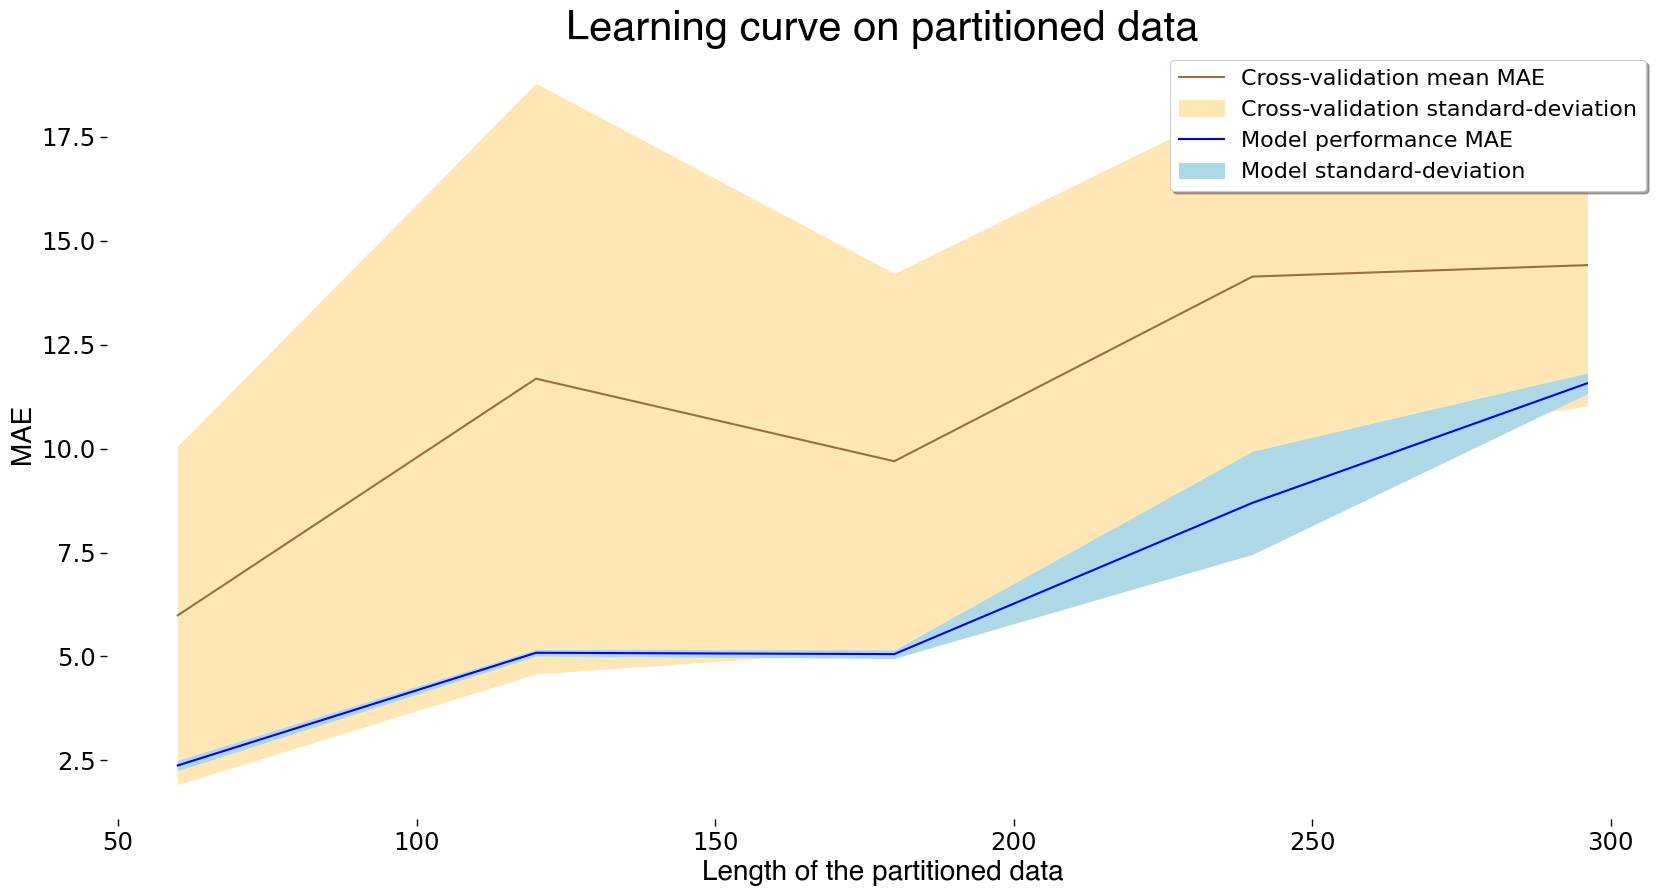

In [125]:
# CV
x = list(cross_validated_results.index)
y = list(cross_validated_results['mean'])
sd =  np.array(list(cross_validated_results_sd['mean']))

# model_performance
y1 = list(test_results['mean'])
sd1 = np.array(list(test_results['std']))


plot = plot_ml_learning_curve(x, y1, y,sd1,  sd, save_pdf = True , path = 'ConStrain_on_google_colab/Data/Plots_for_publication/11_2_LEARN_Data_analysis/Learning_curve_on_partitioned_data_DBTL2')

In [129]:
h2o.shutdown()

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_5141/2900054706.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


H2O session _sid_959e closed.


## compare 